In [138]:
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import random

In [139]:
range_of_TT = []
i = 5.0
while i < 6.5:
    range_of_TT.append(i)
    i += 0.5
print(range_of_TT)
print(len(range_of_TT))

[5.0, 5.5, 6.0]
3


In [140]:

random.seed(589015328) # this seed should not be changed in order to reproduce result
TT = int(10e6)

temperature = 1
numebr_amino_acids = 15
end_of_protein = numebr_amino_acids-1

In [141]:
direction = np.zeros(numebr_amino_acids, dtype =int) # initial chain is a straight line
protein_coordinate = []
coordinate_over_time = []
distance_over_time = []
energy_over_time  =  [0.0]
J = np.zeros((20, 20))
protein_sq = []

In [142]:
def sequence_N_integers(N):
    #array of numbers between 1-20, values represent type of amino acid, can repeat
    return [random.randrange(0,20) for _ in range(N)]
protein_sq = sequence_N_integers(numebr_amino_acids)
print(protein_sq)

[0, 9, 9, 8, 2, 14, 9, 16, 0, 15, 19, 8, 13, 13, 3]


In [143]:
def distance(x1, y1, x2, y2):
    return math.sqrt((x2-x1)**2+(y2-y1)**2)

In [144]:
def diagonal_nigbour(x1, y1):
    up_right = [x1 + 1, y1 + 1]
    down_right= [x1 + 1, y1 - 1]
    down_left = [x1 - 1, y1 - 1]
    up_left = [x1 - 1, y1 + 1]
    return [up_right, down_right, down_left, up_left]

In [145]:
def direct_nigbour(x1,y1):
    up= [x1 , y1 + 1]
    down= [x1 , y1 - 1]
    left = [x1 - 1, y1 ]
    right = [x1 - 1, y1]
    return [up, down, left, right]

In [146]:
def initial_J():
    for i in range(20):
        for j in range(20):
            if (j>=i):
                J[i,j] = random.uniform(-4.0, -2.0)
                J[j,i] = J[i,j]
initial_J()
#J[1,12] == J[12,1] # True
J

array([[-2.77323457, -3.01782368, -2.86870745, -2.01942183, -2.69900151,
        -3.13463769, -3.3529648 , -2.62621456, -3.2599252 , -3.08979194,
        -3.74790596, -2.45271872, -3.76312196, -3.62673276, -2.69574767,
        -3.08792459, -2.5252628 , -3.01721918, -2.44847698, -2.26638083],
       [-3.01782368, -3.31704799, -2.23126578, -3.08425143, -2.30543422,
        -2.73719796, -3.82938603, -3.07447085, -2.45505246, -3.33262639,
        -2.32196133, -3.76687637, -2.77906741, -3.26989745, -2.66682432,
        -2.56310528, -2.121855  , -3.37635667, -2.9100839 , -2.25436812],
       [-2.86870745, -2.23126578, -3.48129058, -3.98008357, -3.12736297,
        -2.81698678, -3.23828945, -3.60628614, -3.09373957, -3.36726804,
        -2.33859314, -2.52796024, -2.42376574, -3.13930094, -3.55515547,
        -2.36226161, -2.22276613, -2.74682593, -3.53534909, -3.73946528],
       [-2.01942183, -3.08425143, -3.98008357, -2.78386191, -3.03236354,
        -3.39046231, -3.19992442, -3.87357367, -

In [147]:

def initial_protein():
    return [[i,10] for i in range(numebr_amino_acids)]

protein_coordinate.append(initial_protein())
protein_coordinate[0][0][1]
print(protein_coordinate[0])

[[0, 10], [1, 10], [2, 10], [3, 10], [4, 10], [5, 10], [6, 10], [7, 10], [8, 10], [9, 10], [10, 10], [11, 10], [12, 10], [13, 10], [14, 10]]


In [148]:
# def total_e(squence, energy, coordinate, t):
#     total = 0
#     for i in range(numebr_amino_acids):
#         temp_protien_type = squence[i]
#         temp_coord = direct_nigbour(coordinate[t][i][0],coordinate[t][i][1])
#         for j in range(i, numebr_amino_acids):
            


In [149]:
def overlap(x,y,t):
    return [x, y] in protein_coordinate[t]
#overlap(1,11,0) # False

In [150]:
def check_i_zero_break(i, t,new_x,new_y):
    next_amino_x = protein_coordinate[t][i + 1][0]
    next_amino_y = protein_coordinate[t][i + 1][1]
    return (distance(next_amino_x,next_amino_y,new_x,new_y) != 1)
    

In [151]:
def check_i_last_break(i, t,new_x,new_y):
    before_amino_x = protein_coordinate[t][i - 1][0]
    before_amino_y = protein_coordinate[t][i - 1][1]
    return (distance(before_amino_x,before_amino_y,new_x,new_y) != 1)

In [152]:
def check_i_middle_break(i,t,new_x,new_y):
    next_amino_x = protein_coordinate[t][i + 1][0]
    next_amino_y = protein_coordinate[t][i + 1][1]
    before_amino_x = protein_coordinate[t][i - 1][0]
    before_amino_y = protein_coordinate[t][i - 1][1]
    return(distance(next_amino_x,next_amino_y,new_x,new_y) != 1 or distance(before_amino_x,before_amino_y,new_x,new_y) != 1)

In [153]:
# for k in direct_nigbour(new_x,new_y):
#         if([next_amino_x,next_amino_y] == k):
#             return True
#         if(k not in protein_coordinate[t]):
#             return True

In [154]:
def check_new_e_zero(i,t,new_x,new_y):
    en = 0
    for pos in direct_nigbour(new_x,new_y): 
        if (pos in protein_coordinate[t]):
            index_next = protein_coordinate[t].index(pos)
            if(index_next == i + 1 ):
                continue
            else:
                en += J[protein_sq[i],protein_sq[index_next]]
        return en

In [155]:
def check_new_e_last(i,t,new_x,new_y):
    en = 0
    for pos in direct_nigbour(new_x,new_y): 
        if (pos in protein_coordinate[t]):
            index_next = protein_coordinate[t].index(pos)
            if(index_next == i - 1 ):
                continue
            else:
                en += J[protein_sq[i],protein_sq[index_next]]
        return en

In [156]:
def check_new_e_middle(i,t,new_x,new_y):
    en = 0
    for pos in direct_nigbour(new_x,new_y): 
        if (pos in protein_coordinate[t]):
            index_next = protein_coordinate[t].index(pos)
            if index_next in [i - 1, i + 1]:
                continue
            else:
                en += J[protein_sq[i],protein_sq[index_next]]
        return en

In [157]:
energy_vs_temp_energy = []
energy_vs_temp_temp = []
energy_vs_temp_length = []



In [158]:
for temper in range_of_TT:
    for t in range(TT): # time or generatation 
        new_e = 0
        new_coord = protein_coordinate[t] # [[],[],[]...,[]]
        #loop throught entire protein
        for i in range(numebr_amino_acids):
            #print(protein_coordinate[t][i][0])
            temp_x = protein_coordinate[t][i][0] # x coordinate for 1st protein in generation t
            temp_y = protein_coordinate[t][i][1] # y coordinate for 1st protein in generation t
            random_dia = diagonal_nigbour(temp_x, temp_y)[random.randrange(4)]
            new_x = random_dia[0]
            new_y = random_dia[1]

            # check overlap
            if overlap(new_x, new_y, t):
                continue

            #check break or not
            if (i == 0):
                if check_i_zero_break(i,t,new_x,new_y):
                    continue
                delta_e = check_new_e_zero(i,t,new_x,new_y) - check_new_e_zero(i,t,temp_x,temp_y)
                if (delta_e < 0):
                    new_coord[i] = [new_x,new_y]
                    new_e += delta_e
                elif min(1, np.exp(-delta_e/4.5))>np.random.random():
                    new_coord[i] = [new_x,new_y]
                    new_e += delta_e

            elif (i > 0 and i < numebr_amino_acids - 1):
                if check_i_middle_break(i,t,new_x, new_y):
                    continue
                delta_e = check_new_e_middle(i,t,new_x,new_y) - check_new_e_middle(i,t,temp_x,temp_y)
                if (delta_e < 0):
                    new_coord[i] = [new_x,new_y]
                    new_e += delta_e
                elif min(1, np.exp(-delta_e/4.5))>np.random.random():
                    new_coord[i] = [new_x,new_y]
                    new_e += delta_e
            elif i == (numebr_amino_acids - 1):
                if check_i_last_break(i,t,new_x,new_y):
                    continue
                delta_e = check_new_e_last(i,t,new_x,new_y) - check_new_e_last(i,t,temp_x,temp_y)
                if (delta_e < 0):
                    new_coord[i] = [new_x,new_y]
                    new_e += delta_e
                elif min(1, np.exp(-delta_e/4.5))>np.random.random():
                    new_coord[i] = [new_x,new_y]
                    new_e += delta_e
                
                # update protein coordinate
        protein_coordinate.append(new_coord)
        # update everything after each generation
        # update end to end distance 
        temp_dis = distance(protein_coordinate[t][0][0],protein_coordinate[t][0][1], protein_coordinate[t][-1][0],protein_coordinate[t][-1][1])
        distance_over_time.append(temp_dis)
        energy_over_time.append(new_e / 2.0)
        coordinate_over_time.append(new_coord)
    energy_vs_temp_energy.append(np.mean(energy_over_time))
    energy_vs_temp_length.append(np.mean(distance_over_time))



In [159]:
# ls  = [[],[]]
# ls[0] = [1,2]
# ls[1] = [2,3]
# print(ls)

In [160]:
#print(coordinate_over_time[-1])
#print(distance_over_time)
#print(energy_over_time)

In [161]:
every_nth_dis = distance_over_time[::1000]
every_nth_energy = energy_over_time[::1000]

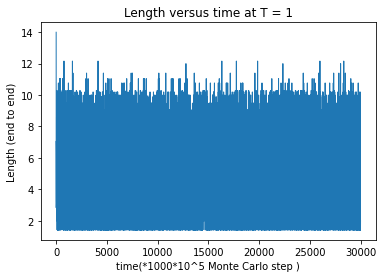

In [162]:
plt.plot(range(len(every_nth_dis)),every_nth_dis,linewidth=1.0)
plt.title('Length versus time at T = 1')
plt.xlabel("time(*1000*10^5 Monte Carlo step )")
plt.ylabel('Length (end to end)')
plt.show()

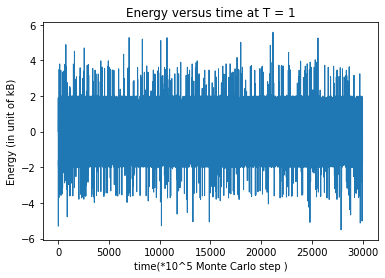

In [163]:
plt.plot(range(len(every_nth_energy)),every_nth_energy,linewidth=1.0)
plt.title('Energy versus time at T = 1')
plt.xlabel("time(*10^5 Monte Carlo step )")
plt.ylabel('Energy (in unit of kB)')
plt.show()

In [164]:
x = []
y = []
for i in range(len(protein_coordinate[-1])):
    x.append(protein_coordinate[-1][i][0])
    y.append(protein_coordinate[-1][i][1])
print(x)
print(y)
protein = np.array(protein_sq)

[167, 167, 168, 168, 167, 167, 168, 168, 169, 170, 170, 171, 172, 173, 174]
[7405, 7404, 7404, 7403, 7403, 7402, 7402, 7401, 7401, 7401, 7400, 7400, 7400, 7400, 7400]


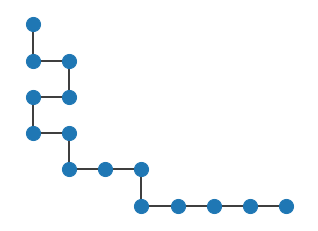

In [165]:
plt.plot(x, y, 'k-', zorder=1)  # straight lines
# large dots colored via the 'tab20' colormap, set zorder=3 to draw the dots on top of the lines
plt.scatter(x, y,  s=200, zorder=3) 

plt.axis('off') # don't show the axes
plt.margins(0.1) # enough margin so that the large scatter dots don't touch the borders
plt.gca().set_aspect('equal') # equal distances in x and y direction 
plt.show()

In [166]:
# range_of_TT = range(1,10)
# print(type(range_of_TT))
# for i in range_of_TT:
#     print(i)

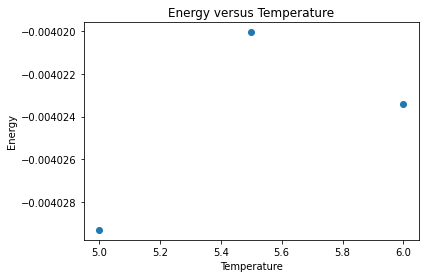

In [167]:
plt.scatter(range_of_TT,energy_vs_temp_energy)
plt.title('Energy versus Temperature')
plt.xlabel('Temperature')
plt.ylabel('Energy')
plt.show()

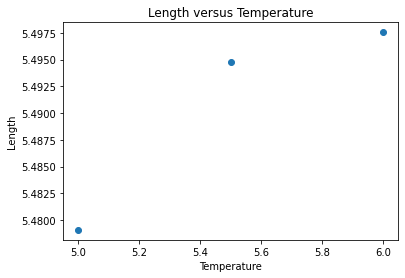

In [168]:
plt.scatter(range_of_TT,energy_vs_temp_length)
plt.title('Length versus Temperature')
plt.xlabel('Temperature')
plt.ylabel('Length')
plt.show()

In [169]:
print(energy_vs_temp_energy)
print(energy_vs_temp_length)

[-0.004029306117536584, -0.004020053495344604, -0.0040234247326900235]
[5.479080781898463, 5.49472902895095, 5.497549749157742]


ValueError: x and y must be the same size

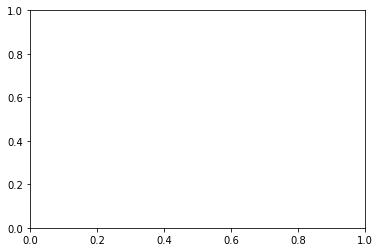

In [170]:
plt.scatter([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5,7.0,7.5,8.0,8.5,9.0,9.5],energy_vs_temp_energy)
plt.title('energy versus tmeperature')
plt.xlabel('temperature')
plt.ylabel('energy')
plt.show()

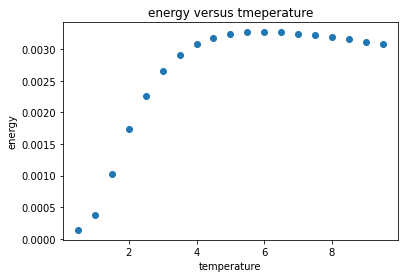

In [ ]:
kk = [-0.00013988086586254306, -0.0003763852195512058, -0.0010215348538788632, -0.001732411217159116, -0.0022648166355634432, -0.0026561819455760798, -0.002907458958205845, -0.003073721750444946, -0.0031788175487762623, -0.003237958646745721, -0.003265276506123856, -0.0032648516003949937, -0.00326604562958725, -0.003245407875636301, -0.0032225093634406206, -0.003190996284202452, -0.0031543240576433385, -0.003115285080018983, -0.00307876413161694]
nega = [element * -1 for element in kk]
yup = [0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5,7.0,7.5,8.0,8.5,9.0,9.5]
plt.scatter(yup,nega)
plt.title('energy versus tmeperature')
plt.xlabel('temperature')
plt.ylabel('energy')
plt.show()